### Learning, problems and future work
**Learnings**
- react dom stores all info in some CDATA in order to not render DB all over again
- real world data has many things to cleanse in pre-processing
- regex is our best friend

**Problems**
- parsing ingredients returns not a full list of items ( in some cases less than 50%)
- categories are not so informative

**Future work:**
- need more data from multiple sources
- recommender bot that sends links to buy some product
- sophistication w/Neural Networks
- parse full list of ingredients from react-cdata
- experiment user-based recommender(zalando includes user reviews)
- compare with zalando's similar products/try this one

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/processed_cosmetics.csv')

Goal:
- Build item by ingredients dataframe (encoding ingredients of each item)
- TSNE dimensionality reduction, plus some visulization


In [3]:
data.category.value_counts()

face care      1271
sun protect     819
skin tone       666
Name: category, dtype: int64

In [4]:
data.head()

,category,brand,name,price,rating,ingredients,All skin types,Combination skin,Dry skin,Mature skin,Normal skin,Oily skin,Sensitive skin
0,skin tone,Darphin,MELAPERFECT FOUNDATION NEUTRAL - Foundation,39.95,4.000000,"water, methyl, trimethicone, phenyl trimeth...",0,0,0,0,0,0,0
1,skin tone,Nyx Professional Makeup,HD PHOTOGENIC CONCEALER WAND - Concealer,6.95,4.143646,"water, trimethylsiloxyphenyl dimethicone, tr...",0,0,0,0,0,0,0
2,skin tone,Nyx Professional Makeup,BARE WITH ME TINTED SKIN VEIL - Setting spray ...,9.95,4.560000,"water, glycerin, alcohol denat, aloe barbad...",0,0,0,0,0,0,0
3,skin tone,MAC,PREP + PRIME FIX + MATTIFYING MIST 100ML - Primer,22.50,4.327586,"water, alcohol denat, , silica, sodium hyalur...",0,0,0,0,0,0,0
4,skin tone,MAC,STUDIO FIX FLUID SPF15 FOUNDATION - Foundation,33.95,4.485348,"octinoxate 2.50%, titanium dioxide 1.00%water...",0,0,0,0,0,0,0


In [5]:
skin_types = ['All skin types','Combination skin',
              'Dry skin','Mature skin','Normal skin',
              'Oily skin','Sensitive skin']

Without cleaning ingredients the encoded size was *3309* \
after considerate pre-processing reduced to *2775* improved by `500`

In [6]:
encoded = data['ingredients'].str.get_dummies(sep=', ')

In [7]:
encoded.columns = encoded.columns.str.lstrip()

In [8]:
new_data = pd.concat([data['name'], encoded], axis=1)

In [9]:
new_data.set_index('name')

,,,ci 15850 / red 6,ci 77491,alcohol,ci 15850 / red 6,dimethicone,ethyl hex,glycereth-26,hydroxyethylcellulose,...,zea mays starch / corn starch,zeste de cuivre : mica,zinc oxide,zinc oxide 2.0% water\aqua\eau,zinc oxide 4.0% water\aqua\eau,zinc stearate,zingiber officinale (ginger) root extract,albizia julibrissin bark extract,panc,◊olea europaea (olive) fruit oil
name,,,,,,,,,,,,,,,,,,,,,
MELAPERFECT FOUNDATION NEUTRAL - Foundation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HD PHOTOGENIC CONCEALER WAND - Concealer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BARE WITH ME TINTED SKIN VEIL - Setting spray & powder,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PREP + PRIME FIX + MATTIFYING MIST 100ML - Primer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
STUDIO FIX FLUID SPF15 FOUNDATION - Foundation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PREP + PRIME FIX +100ML - Primer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PRO LONGWEAR CONCEALER - Concealer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MINERALIZE SKINFINISH - Highlighter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MINI PREP + PRIME FIX +LITTLE M.A.C 30ML - Setting spray & powder,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
new_data = new_data.drop('', axis=1)

In [11]:
new_data = pd.concat([new_data, data[skin_types]], axis=1)

In [12]:
X = new_data.iloc[:, 1:]
X.shape

(2756, 2781)

### Visualization

In [13]:
# model = TSNE(n_components = 2, random_state=42, n_jobs=-1)
model = TSNE(n_components = 2, learning_rate = 200)

In [14]:
%%time
tsne_features = model.fit_transform(X)

CPU times: user 1min 39s, sys: 5.01 s, total: 1min 44s
Wall time: 1min 45s


In [15]:
data['X'] = tsne_features[:, 0]
data['Y'] = tsne_features[:, 1]

In [16]:
def draw_skin_types(data, skin_type):
    sns.lmplot("X", "Y", 
           data=data, 
           fit_reg=False, 
           col=skin_type, col_wrap=2)

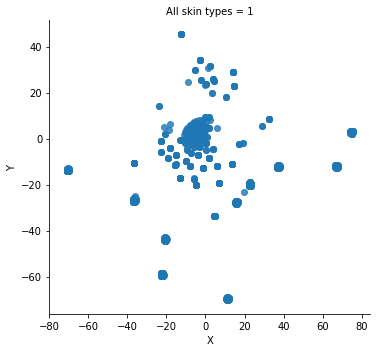

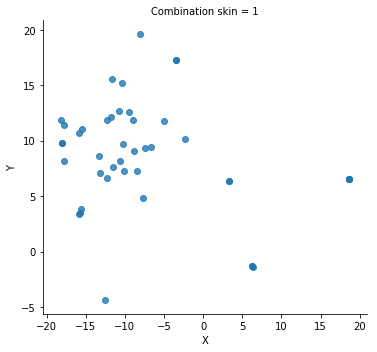

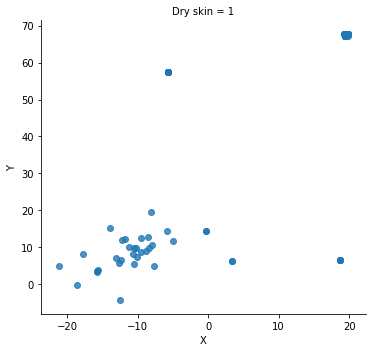

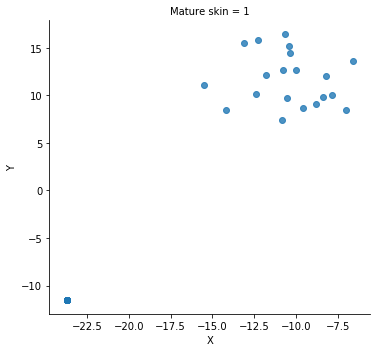

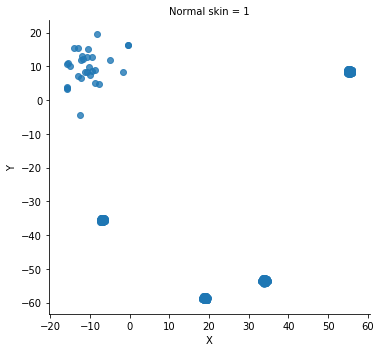

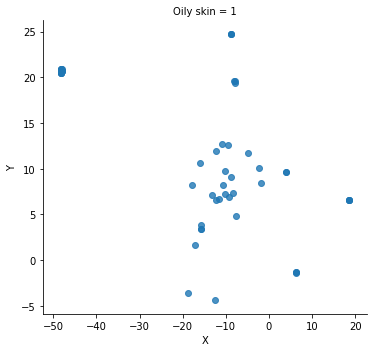

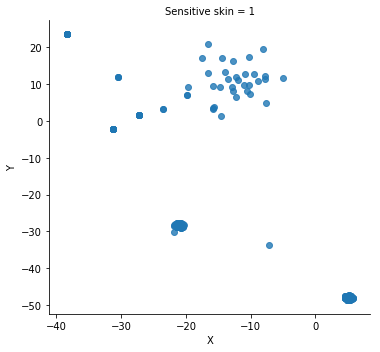

In [17]:
for skin_type in skin_types:
    data_filtered = data[data[skin_type] == 1]
    draw_skin_types(data_filtered, skin_type)

- Content-based Recommendation Filtering
* Косинусная мера - косинус угла между векторами рейтингов. Если два вектора равнонаправлены, их косинусный коэффициент равен 1. Если направление противоположно, то -1.

$$ \text{similarity}=\cos(\theta )={\mathbf {A} \cdot \mathbf {B}  \over \|\mathbf {A} \|_{2}\|\mathbf {B} \|_{2}}={\frac {\sum \limits _{i=1}^{n}{A_{i}B_{i}}}{{\sqrt {\sum \limits _{i=1}^{n}{A_{i}^{2}}}}{\sqrt {\sum \limits _{i=1}^{n}{B_{i}^{2}}}}}} $$



In [18]:
data['dist'] = 0.0

In [19]:
data.head()

,category,brand,name,price,rating,ingredients,All skin types,Combination skin,Dry skin,Mature skin,Normal skin,Oily skin,Sensitive skin,X,Y,dist
0,skin tone,Darphin,MELAPERFECT FOUNDATION NEUTRAL - Foundation,39.95,4.000000,"water, methyl, trimethicone, phenyl trimeth...",0,0,0,0,0,0,0,16.304724,-2.546037,0.0
1,skin tone,Nyx Professional Makeup,HD PHOTOGENIC CONCEALER WAND - Concealer,6.95,4.143646,"water, trimethylsiloxyphenyl dimethicone, tr...",0,0,0,0,0,0,0,1.826923,13.704471,0.0
2,skin tone,Nyx Professional Makeup,BARE WITH ME TINTED SKIN VEIL - Setting spray ...,9.95,4.560000,"water, glycerin, alcohol denat, aloe barbad...",0,0,0,0,0,0,0,-5.860127,11.562891,0.0
3,skin tone,MAC,PREP + PRIME FIX + MATTIFYING MIST 100ML - Primer,22.50,4.327586,"water, alcohol denat, , silica, sodium hyalur...",0,0,0,0,0,0,0,-12.968019,10.548976,0.0
4,skin tone,MAC,STUDIO FIX FLUID SPF15 FOUNDATION - Foundation,33.95,4.485348,"octinoxate 2.50%, titanium dioxide 1.00%water...",0,0,0,0,0,0,0,4.173127,-32.666939,0.0


In [20]:
myItem = data[data.name.str.contains('MOISTURE SURGE')]
myItem = myItem[:1]

[мой крем](https://en.zalando.de/clinique-moisture-surge-72-hour-auto-replenishing-hydrator-30ml-skin-moisturizer-neutral-cll31g011-s11.html)

![](img/clinique.png)

In [21]:
myItem

,category,brand,name,price,rating,ingredients,All skin types,Combination skin,Dry skin,Mature skin,Normal skin,Oily skin,Sensitive skin,X,Y,dist
669,face care,Clinique,MOISTURE SURGE 72-HOUR AUTO-REPLENISHING HYDRA...,19.0,4.708502,"water, dimethicone, butylene glycol, glycerin,...",0,0,1,0,0,0,0,-21.270014,4.852535,0.0


In [22]:
P1 = np.array([myItem.X.values, myItem.Y.values]).T

In [23]:
def cos_similarity(P1, P2):
    matrix_sum = (P1 * P2).sum()
    matrix_size = (np.sqrt(np.square(P1).sum()) * np.sqrt(np.square(P2).sum()))
    return matrix_sum/matrix_size

In [24]:
# cosine similarities with other items
for i in range(len(data)):
    P2 = np.array([data['X'][i], data['Y'][i]]).reshape(-1, 1)
    data.dist[i] = cos_similarity(P1, P2)

In [25]:
data['dist'].isnull().sum()

0

In [26]:
recos = data.sort_values('dist')
recommendations_myItem = recos[['name', 'brand','price', 'rating','dist']].head(10)

In [27]:
recommendations_myItem

,name,brand,price,rating,dist
408,LONGWEAR LIQUID FOUNDATION - Foundation,Topshop Beauty,19.95,3.600000,-1.064226
422,LONGWEAR LIQUID FOUNDATION - Foundation,Topshop Beauty,19.95,3.600000,-1.064226
537,LONGWEAR LIQUID FOUNDATION - Foundation,Topshop Beauty,19.95,3.600000,-1.064226
540,LONGWEAR LIQUID FOUNDATION - Foundation,Topshop Beauty,19.95,3.600000,-1.064226
519,LONGWEAR LIQUID FOUNDATION - Foundation,Topshop Beauty,19.95,3.600000,-1.064226
640,LONGWEAR LIQUID FOUNDATION - Foundation,Topshop Beauty,19.95,3.600000,-1.064226
998,BAR SOAP 100G - Soap bar,Skandinavisk,9.95,4.727272,-1.063974
1356,BAR SOAP 100G - Soap bar,Skandinavisk,9.95,4.727272,-1.063950
1371,BAR SOAP 100G - Soap bar,Skandinavisk,9.95,4.727272,-1.063950
1341,BAR SOAP 100G - Soap bar,Skandinavisk,9.95,4.727272,-1.063950


![](img/not_unique.png)

In [28]:
def cosmetic_recommender(product_name, top=5):
    P1 = np.array([product_name.X.values, product_name.Y.values]).T
    for i in range(len(data)):
        P2 = np.array([data['X'][0], data['Y'][0]]).reshape(-1, 1)
        data.dist[i] = cos_similarity(P1, P2)
    recoms = data.sort_values('dist')
    return recoms.head(top)

![](img/my_recom.png)

In [29]:
X.head()

,ci 15850 / red 6,ci 77491,alcohol,ci 15850 / red 6,dimethicone,ethyl hex,glycereth-26,hydroxyethylcellulose,m i ca,mica,...,albizia julibrissin bark extract,panc,◊olea europaea (olive) fruit oil,All skin types,Combination skin,Dry skin,Mature skin,Normal skin,Oily skin,Sensitive skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# cosine_similarity(X,X) no TSNE for recommender so that you remove randomness


#### Experiment with LightFm or Surprise \
for item_ingredient item_item?